In [54]:
#import data handling libraries
import pandas as pd
import numpy as np
import json

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#load the dictionaries
with open ('../Data/Dictionaries/crse_dict.json') as f:
    crse_dict = json.load(f)
with open ('../Data/Dictionaries/math_dict.json') as f:
    math_dict = json.load(f)
with open ('../Data/Dictionaries/gen_dict.json') as f:
    gen_dict = json.load(f)

#make the course lists
courses = list(crse_dict.keys())
math_courses = list(math_dict.keys())
gen_courses = list(gen_dict.keys())

#read in the main dataset
df = pd.read_csv('../Data/Datasets/dataset_engineered.csv')

df

,STUDENT,ENT_SEM,GRAD_SEM,165,166,265,143,140,104,150,...,SEM_8.0_GEN_cdf,SEM_8.5_GEN_cdf,SEM_9.0_GEN_cdf,SEM_9.5_GEN_cdf,SLOPE,INT,SLOPE_MATH,INT_MATH,SLOPE_GEN,INT_GEN
0,0,20.6,9.5,0.0,0.0,-3.5,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1.368421e-01,5.444869e-17,0.0,0.0,-1.368421e-01,5.444869e-17
1,3,20.4,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,-2.363863e-17,1.000000e+00,0.0,0.0,-2.363863e-17,1.000000e+00
2,4,19.6,9.5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,2.701754e-01,1.017544e+00,0.0,0.0,2.701754e-01,1.017544e+00
3,5,20.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
4,7,19.6,8.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,1,1,1,1,1.543860e-01,-1.929825e-01,0.0,0.0,1.543860e-01,-1.929825e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,13059,20.6,4.5,0.0,0.0,0.0,0.0,3.5,0.0,1.0,...,2,2,2,2,1.684211e-01,7.894737e-01,0.0,0.0,1.684211e-01,7.894737e-01
9177,13060,14.6,12.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.5,...,-2,-2,-2,-2,-1.368421e-01,-1.052632e+00,0.0,0.0,-1.368421e-01,-1.052632e+00
9178,13061,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
9179,13062,13.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.5,...,-1,-1,-1,-1,-1.543860e-01,1.929825e-01,0.0,0.0,-1.543860e-01,1.929825e-01


In [55]:
df.columns

Index(['STUDENT', 'ENT_SEM', 'GRAD_SEM', '165', '166', '265', '143', '140',
       '104', '150', '207', '201', '317', '267', '105', '301', '266', '414',
       '160', '101', '25', '492', '341', '385', '435', '397', '436', '495',
       '314', '500', '304', 'Y', 'TM', 'SEM_0.5_cdf', 'SEM_1.0_cdf',
       'SEM_1.5_cdf', 'SEM_2.0_cdf', 'SEM_2.5_cdf', 'SEM_3.0_cdf',
       'SEM_3.5_cdf', 'SEM_4.0_cdf', 'SEM_4.5_cdf', 'SEM_5.0_cdf',
       'SEM_5.5_cdf', 'SEM_6.0_cdf', 'SEM_6.5_cdf', 'SEM_7.0_cdf',
       'SEM_7.5_cdf', 'SEM_8.0_cdf', 'SEM_8.5_cdf', 'SEM_9.0_cdf',
       'SEM_9.5_cdf', 'SEM_0.5_MATH_cdf', 'SEM_1.0_MATH_cdf',
       'SEM_1.5_MATH_cdf', 'SEM_2.0_MATH_cdf', 'SEM_2.5_MATH_cdf',
       'SEM_3.0_MATH_cdf', 'SEM_3.5_MATH_cdf', 'SEM_4.0_MATH_cdf',
       'SEM_4.5_MATH_cdf', 'SEM_5.0_MATH_cdf', 'SEM_5.5_MATH_cdf',
       'SEM_6.0_MATH_cdf', 'SEM_6.5_MATH_cdf', 'SEM_7.0_MATH_cdf',
       'SEM_7.5_MATH_cdf', 'SEM_8.0_MATH_cdf', 'SEM_8.5_MATH_cdf',
       'SEM_9.0_MATH_cdf', 'SEM_9.5_M

In [56]:
courses = ['165', '166', '265', '143', '140',
       '104', '150', '207', '201', '317', '267', '105', '301', '266', '414',
       '160', '101', '25', '492', '341', '385', '435', '397', '436', '495',
       '314', '500', '304']
SEMs = ['ENT_SEM', 'SEM_0.5_cdf', 'SEM_1.0_cdf',
       'SEM_1.5_cdf', 'SEM_2.0_cdf', 'SEM_2.5_cdf', 'SEM_3.0_cdf',
       'SEM_3.5_cdf', 'SEM_4.0_cdf', 'SEM_4.5_cdf', 'SEM_5.0_cdf',
       'SEM_5.5_cdf', 'SEM_6.0_cdf', 'SEM_6.5_cdf', 'SEM_7.0_cdf',
       'SEM_7.5_cdf', 'SEM_8.0_cdf', 'SEM_8.5_cdf', 'SEM_9.0_cdf',
       'SEM_9.5_cdf', 'SEM_0.5_MATH_cdf', 'SEM_1.0_MATH_cdf',
       'SEM_1.5_MATH_cdf', 'SEM_2.0_MATH_cdf', 'SEM_2.5_MATH_cdf',
       'SEM_3.0_MATH_cdf', 'SEM_3.5_MATH_cdf', 'SEM_4.0_MATH_cdf',
       'SEM_4.5_MATH_cdf', 'SEM_5.0_MATH_cdf', 'SEM_5.5_MATH_cdf',
       'SEM_6.0_MATH_cdf', 'SEM_6.5_MATH_cdf', 'SEM_7.0_MATH_cdf',
       'SEM_7.5_MATH_cdf', 'SEM_8.0_MATH_cdf', 'SEM_8.5_MATH_cdf',
       'SEM_9.0_MATH_cdf', 'SEM_9.5_MATH_cdf']
conts = ['SLOPE', 'INT', 'SLOPE_MATH', 'INT_MATH', 'SLOPE_GEN', 'INT_GEN']
full_features = conts + courses + SEMs + ['TM']

print('Number of features:', len(full_features))

print('Overall grad rate:', df['Y'].mean())

random_states = [5917, 656, 4125, 2797, 9936, 2010, 101, 23, 42, 999]
print('Random states:', random_states)

Number of features: 74
Overall grad rate: 0.4897070035943797
Random states: [5917, 656, 4125, 2797, 9936, 2010, 101, 23, 42, 999]


In [57]:
splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[full_features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['TM'])
    splits.append((X_train, X_test, y_train, y_test))

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

In [58]:
xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       random_state=random_states[i],
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

Best accuracy for split 0:  66.150%
Best accuracy for split 1:  66.231%
Best accuracy for split 2:  66.885%
Best accuracy for split 3:  66.857%
Best accuracy for split 4:  66.367%
Best accuracy for split 5:  66.068%
Best accuracy for split 6:  66.762%
Best accuracy for split 7:  65.836%
Best accuracy for split 8:  66.285%
Best accuracy for split 9:  66.476%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.661497,0.654328,0.647191,0.64214,0.644656
1,0.66231,0.662493,0.6633,0.648738,0.655938
2,0.668845,0.65705,0.639509,0.651136,0.64527
3,0.668573,0.643985,0.637106,0.614173,0.62543
4,0.663669,0.660316,0.648948,0.656215,0.652561
5,0.660675,0.672836,0.666667,0.670354,0.668505
6,0.667619,0.654872,0.659118,0.613762,0.635632
7,0.658362,0.668481,0.661148,0.664817,0.662977
8,0.662853,0.650517,0.647059,0.625418,0.636054
9,0.664759,0.659771,0.666667,0.63388,0.64986


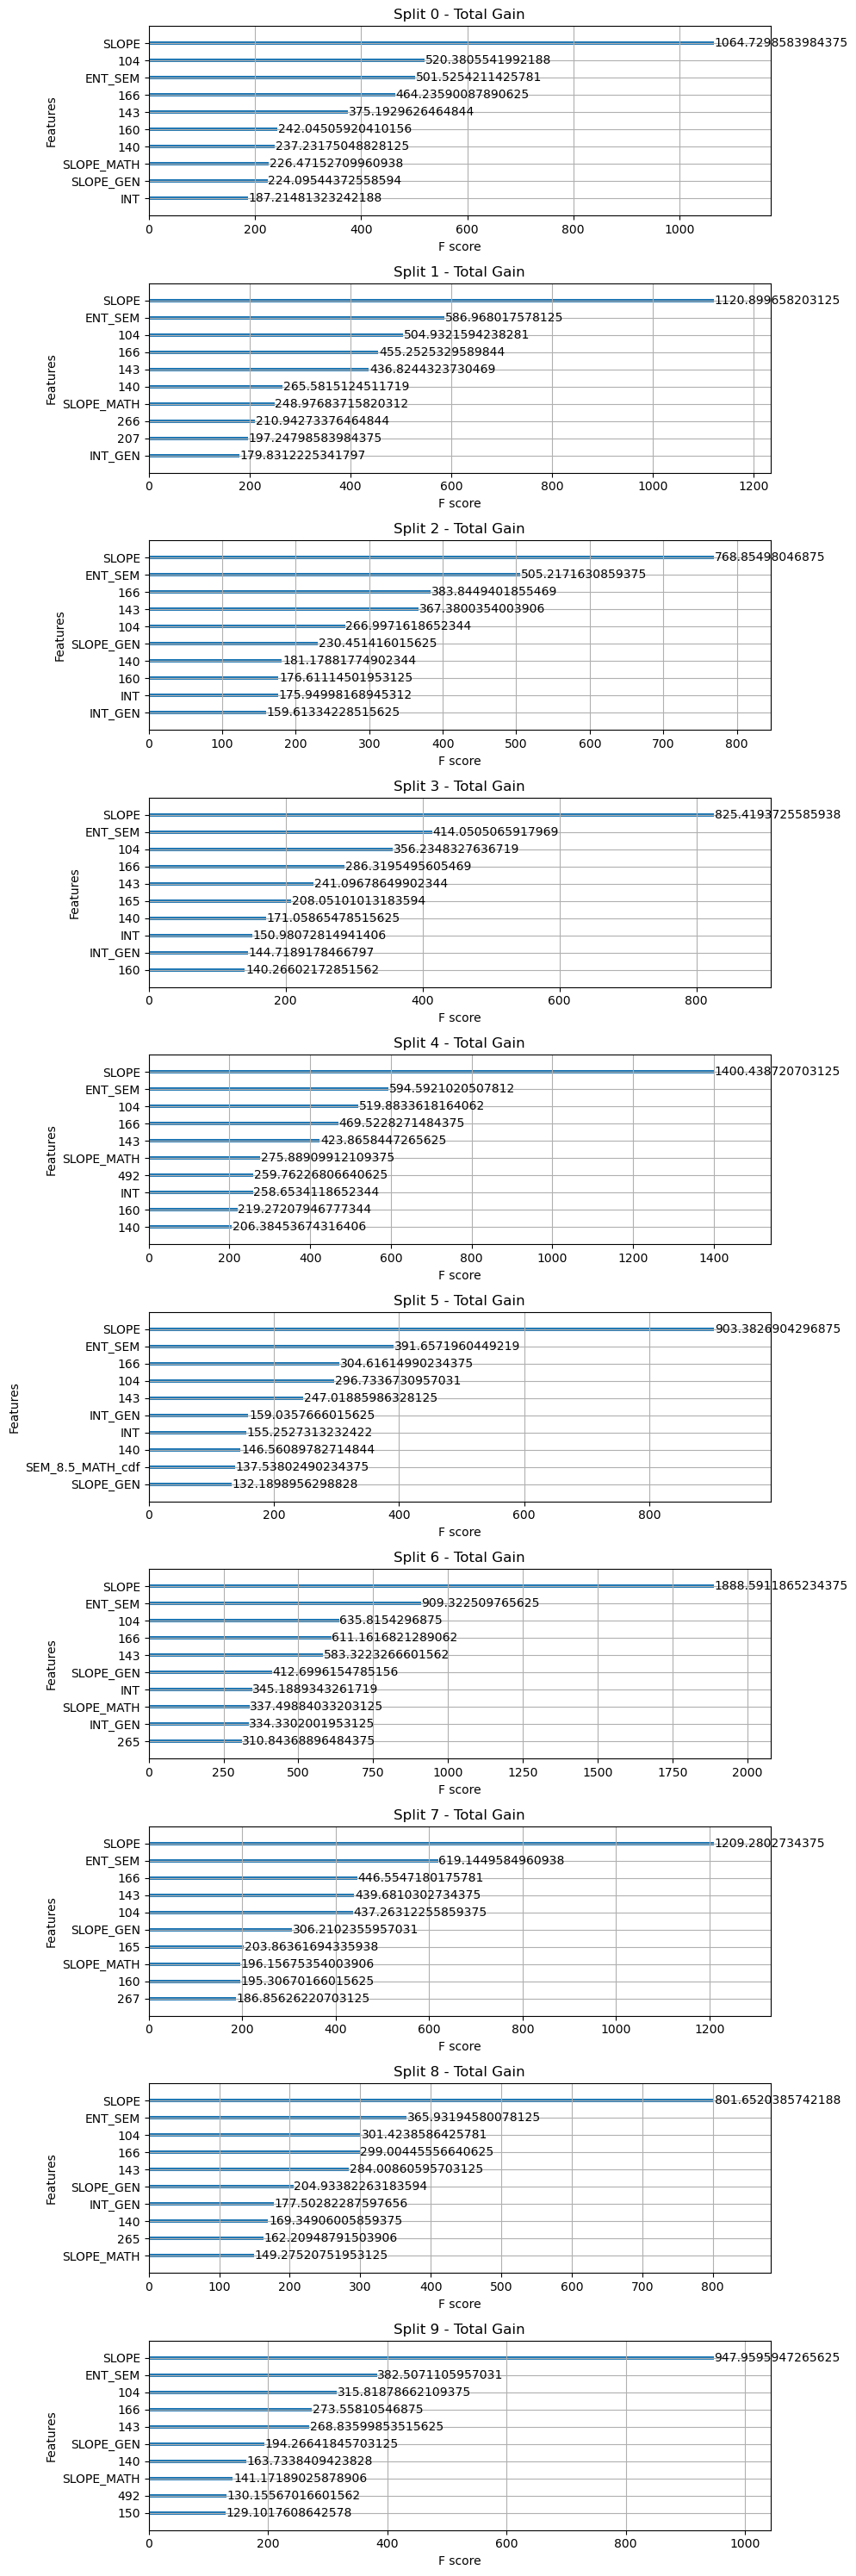

In [60]:
# Create a 5x1 grid of subplots
fig, ax = plt.subplots(len(splits), 1, figsize=(10, 30))

for i, search in enumerate(xgb_models):
    # Plot gain
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='total_gain', 
                        max_num_features=10,
                        title=f'Split {i} - Total Gain')
    ax[i].set_ylabel('Features')
    ax[i].set_xlabel('F score')

plt.tight_layout()
plt.show()


In [ ]:
#get the top ten features for each split. Make a list consisting of all these features together
top_features = []
for i, search in enumerate(xgb_models):
    top_features.extend(search.best_estimator_.feature_importances_)

In [74]:
SEM_2 = ['ENT_SEM']
SEM_2 += [f'SEM_{sem}_cdf' for sem in [1.0,2.0,4.5,9.5]]
SEM_2 += [f'SEM_{sem}_MATH_cdf' for sem in [1.0,2.0,4.5,9.5]]
features_2 = courses + SEMs + conts + ['TM']

splits_2 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    X_train_2 = X_train[features_2]
    X_test_2 = X_test[features_2]
    splits_2.append((X_train_2, X_test_2, y_train, y_test))

In [76]:
xgb_models_2 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       random_state=random_states[i],
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_2.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df_2 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_2):
    y_pred = search.predict(splits_2[i][1])
    xgb_df_2.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_2.loc[i, 'test_accuracy'] = accuracy_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_precision'] = precision_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_recall'] = recall_score(splits_2[i][3], y_pred)
    xgb_df_2.loc[i, 'test_f1'] = f1_score(splits_2[i][3], y_pred)
xgb_df_2

Best accuracy for split 0:  66.122%
Best accuracy for split 1:  66.299%
Best accuracy for split 2:  66.884%
Best accuracy for split 3:  66.857%
Best accuracy for split 4:  66.272%
Best accuracy for split 5:  66.013%
Best accuracy for split 6:  66.694%
Best accuracy for split 7:  65.537%
Best accuracy for split 8:  66.231%
Best accuracy for split 9:  66.599%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.661225,0.654328,0.647191,0.64214,0.644656
1,0.66299,0.662493,0.66257,0.650933,0.6567
2,0.668845,0.656505,0.640361,0.645455,0.642898
3,0.668573,0.643985,0.637106,0.614173,0.62543
4,0.662716,0.657594,0.645695,0.655095,0.650361
5,0.66013,0.659771,0.656918,0.646018,0.651422
6,0.666937,0.655961,0.664225,0.603774,0.632558
7,0.655365,0.671203,0.664088,0.667037,0.665559
8,0.662309,0.654872,0.649262,0.637681,0.64342
9,0.665986,0.663038,0.669725,0.638251,0.653609


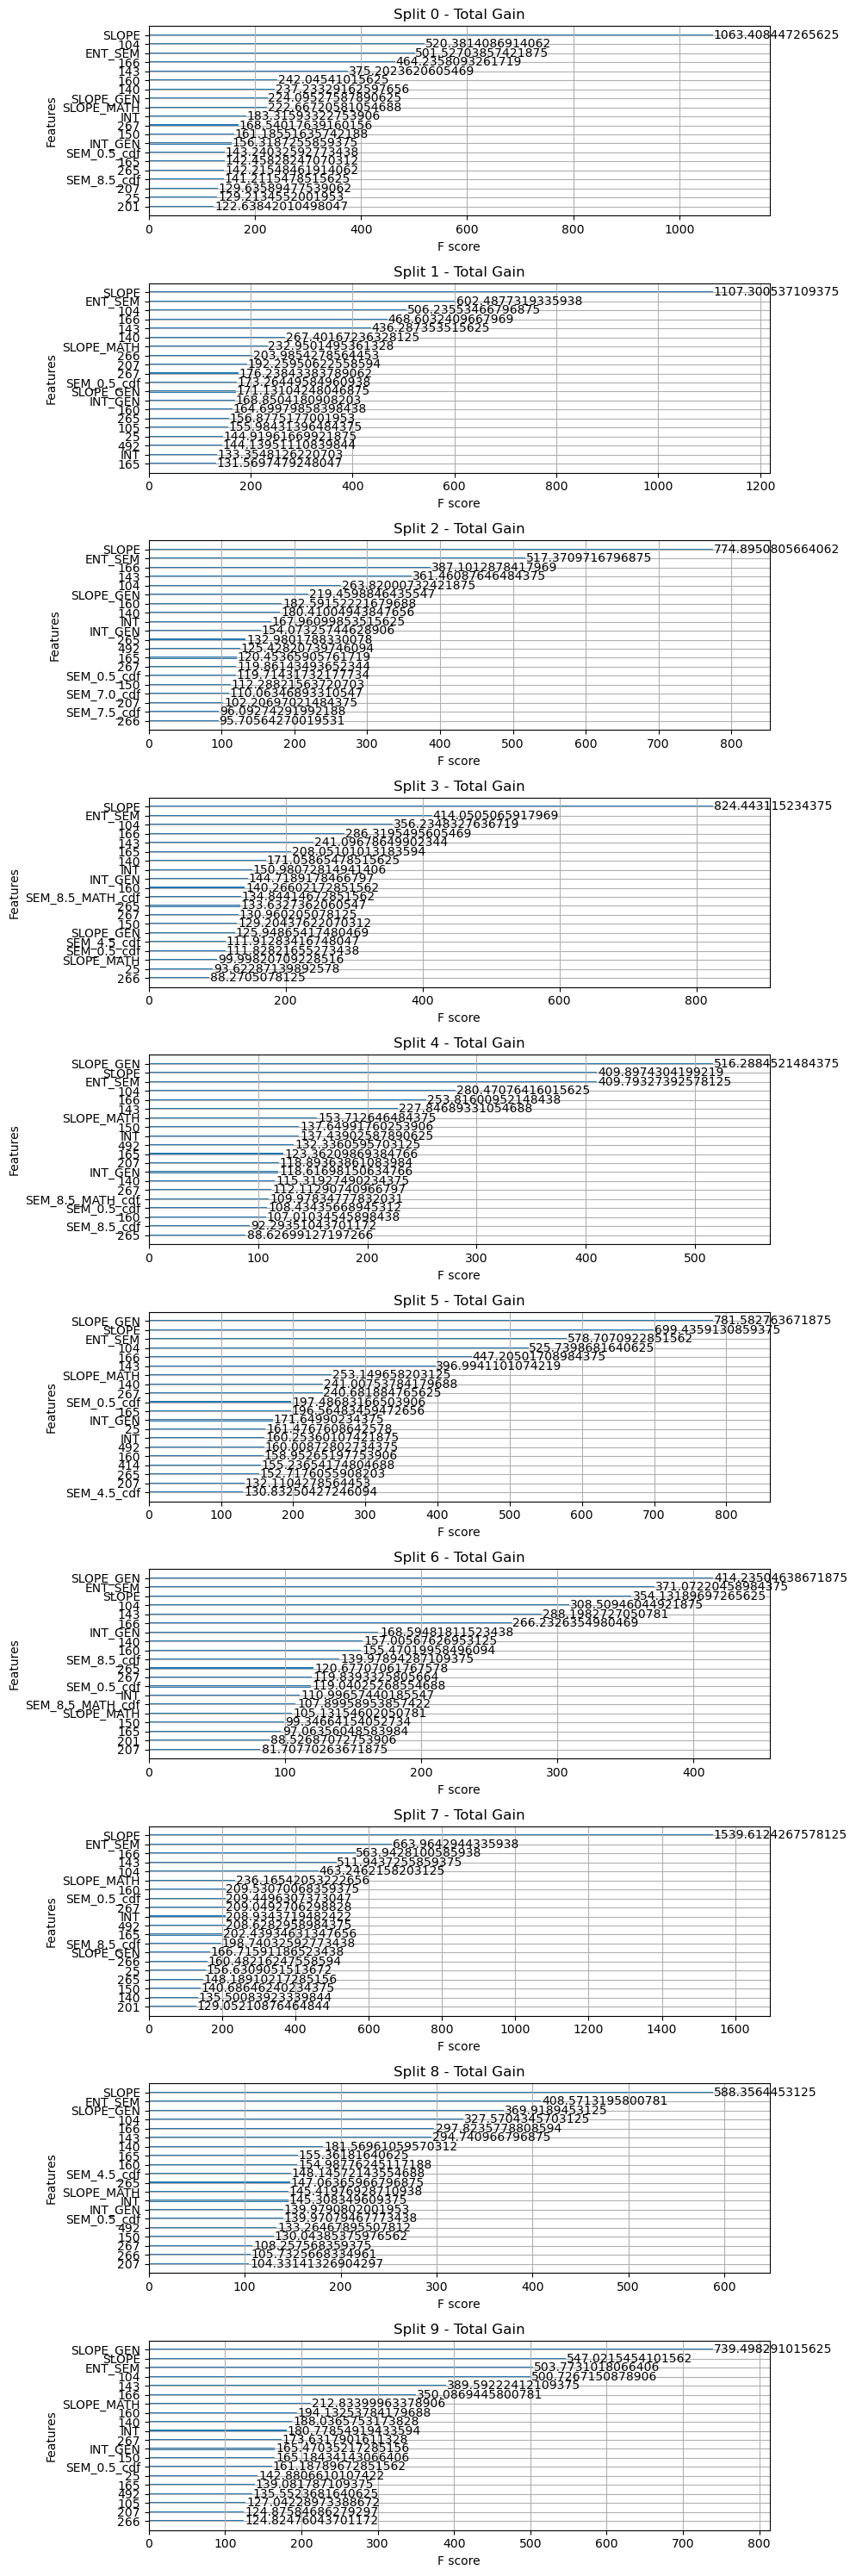

In [78]:
# Create a 5x1 grid of subplots
fig, ax = plt.subplots(10, 1, figsize=(10, 30))

for i, search in enumerate(xgb_models_2):
    # Plot gain
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='total_gain', 
                        max_num_features=20,
                        title=f'Split {i} - Total Gain')
    ax[i].set_ylabel('Features')
    ax[i].set_xlabel('F score')

plt.tight_layout()
plt.show()


In [ ]:
classifiers = {
    # Putting linear decision boundary classifiers first
    'lda' : LinearDiscriminantAnalysis(),
    'log_reg' : LogisticRegression(penalty=None, max_iter= 100000),
    'svc_linear' : LinearSVC(dual = 'auto'),
    'svc_rbf' : Pipeline([('scale', StandardScaler()),('svc',SVC(kernel= 'rbf'))])
}
# importances = {}

# for model_name, model in classifiers.items():
#     model.fit(X_train, y_train)
#     if hasattr(model, 'named_steps'):
#         # For pipelines, get the final step
#         final_model = model.named_steps[list(model.named_steps.keys())[-1]]
#     else:
#         final_model = model
    
#     if hasattr(final_model, 'feature_importances_'):
#         importances[model_name] = final_model.feature_importances_
#     elif hasattr(final_model, 'coef_'):
#         importances[model_name] = final_model.coef_[0]  # For linear models
        
# # Print feature importances or coefficients ordered by absolute value
# for model_name, importance in importances.items():
#     print(f"\nFeature importances for {model_name}:")
#     sorted_importances = sorted(zip(X_train.columns, importance), key=lambda x: abs(x[1]), reverse=True)
#     for feature_name, value in sorted_importances:
#         print(f"{feature_name}: {value}")

# Cross Validation
results_df = pd.DataFrame(columns=['model', 'split', 'accuracy', 'precision', 'recall', 'f1'])
fitted_models = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print('Accuracies for split', i)
    for model_name, model in classifiers.items():
        accuracy = cross_val_score(model, 
                                 X_train, 
                                 y_train, 
                                 cv=5,
                                 scoring='accuracy').mean()
        print(f'{model_name:12} {accuracy:.4f}')
        # Fit the model and store it
        model.fit(X_train, y_train)
        fitted_models.append((model_name, model))

        # Calculate other metrics
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append the results to the DataFrame
        results_df['model'] = model_name
        results_df['split'] = i
        results_df['accuracy'] = accuracy
        results_df['precision'] = precision
        results_df['recall'] = recall
        results_df['f1'] = f1

Accuracies for split 0
lda          0.6325
log_reg      0.6322
svc_linear   0.6339
svc_rbf      0.6482
Accuracies for split 1
lda          0.6288
log_reg      0.6288
svc_linear   0.6281
svc_rbf      0.6516
Accuracies for split 2
lda          0.6281
log_reg      0.6296
svc_linear   0.6289
svc_rbf      0.6472
Accuracies for split 3
lda          0.6303
log_reg      0.6324
svc_linear   0.6315
svc_rbf      0.6556
Accuracies for split 4
lda          0.6277
log_reg      0.6276
svc_linear   0.6262
svc_rbf      0.6458
Accuracies for split 5
lda          0.6295
log_reg      0.6299
svc_linear   0.6300
svc_rbf      0.6480
Accuracies for split 6
lda          0.6299
log_reg      0.6310
svc_linear   0.6303
svc_rbf      0.6496
Accuracies for split 7
lda          0.6275
log_reg      0.6291
svc_linear   0.6291
svc_rbf      0.6422
Accuracies for split 8
lda          0.6288
log_reg      0.6288
svc_linear   0.6288
svc_rbf      0.6477
Accuracies for split 9
lda          0.6336
log_reg      0.6322
svc_linear

In [75]:
# Cross Validation
results_df_2 = pd.DataFrame(columns=['model', 'split', 'accuracy', 'precision', 'recall', 'f1'])
fitted_models_2 = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    print('Accuracies for split', i)
    for model_name, model in classifiers.items():
        accuracy = cross_val_score(model, 
                                 X_train, 
                                 y_train, 
                                 cv=5,
                                 scoring='accuracy').mean()
        print(f'{model_name:12} {accuracy:.4f}')
        # Fit the model and store it
        model.fit(X_train, y_train)
        fitted_models_2.append((model_name, model))

        # Calculate other metrics
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_df_2['model'] = model_name
        results_df_2['split'] = i
        results_df_2['accuracy'] = accuracy
        results_df_2['precision'] = precision
        results_df_2['recall'] = recall
        results_df_2['f1'] = f1

Accuracies for split 0
lda          0.6325
log_reg      0.6322
svc_linear   0.6339
svc_rbf      0.6482
Accuracies for split 1
lda          0.6288
log_reg      0.6292
svc_linear   0.6281
svc_rbf      0.6516
Accuracies for split 2
lda          0.6281
log_reg      0.6300
svc_linear   0.6291
svc_rbf      0.6472
Accuracies for split 3
lda          0.6303
log_reg      0.6324
svc_linear   0.6318
svc_rbf      0.6556
Accuracies for split 4
lda          0.6277
log_reg      0.6276
svc_linear   0.6261
svc_rbf      0.6458
Accuracies for split 5
lda          0.6295
log_reg      0.6309
svc_linear   0.6300
svc_rbf      0.6480
Accuracies for split 6
lda          0.6299
log_reg      0.6307
svc_linear   0.6303
svc_rbf      0.6496
Accuracies for split 7
lda          0.6275
log_reg      0.6284
svc_linear   0.6291
svc_rbf      0.6422
Accuracies for split 8
lda          0.6288
log_reg      0.6281
svc_linear   0.6285
svc_rbf      0.6477
Accuracies for split 9
lda          0.6336
log_reg      0.6324
svc_linear

In [ ]:
svc_rbf = fitted_models_2[3]

#compare the predictions of svc_rbf with the predictions of xgb_models_2[0]
y_pred_svc_rbf = svc_rbf[1].predict(splits_2[0][1])
y_pred_xgb = xgb_models_2[0].predict(splits_2[0][1])

#check where the predictions are different
diff = y_pred_svc_rbf - y_pred_xgb
diff_indices = np.where(diff != 0)[0]
diff_indices



array([  13,   22,   24,   31,   36,   39,   54,   76,   80,   88,   94,
        102,  132,  137,  139,  155,  165,  166,  170,  175,  181,  182,
        183,  184,  188,  190,  213,  219,  264,  268,  281,  289,  295,
        301,  302,  304,  331,  362,  368,  375,  376,  383,  385,  403,
        406,  415,  464,  469,  512,  526,  535,  540,  553,  556,  570,
        576,  588,  617,  623,  625,  650,  654,  670,  682,  696,  705,
        724,  725,  743,  745,  753,  763,  778,  781,  785,  786,  787,
        791,  798,  799,  812,  813,  817,  825,  843,  844,  848,  854,
        860,  886,  890,  892,  900,  902,  928,  958,  962,  971,  979,
        992,  994, 1003, 1010, 1027, 1030, 1035, 1036, 1046, 1063, 1074,
       1079, 1089, 1091, 1097, 1100, 1102, 1107, 1121, 1153, 1157, 1163,
       1175, 1180, 1188, 1241, 1252, 1268, 1284, 1287, 1289, 1294, 1302,
       1304, 1305, 1309, 1353, 1365, 1372, 1387, 1398, 1400, 1403, 1414,
       1416, 1428, 1443, 1454, 1460, 1467, 1471, 15

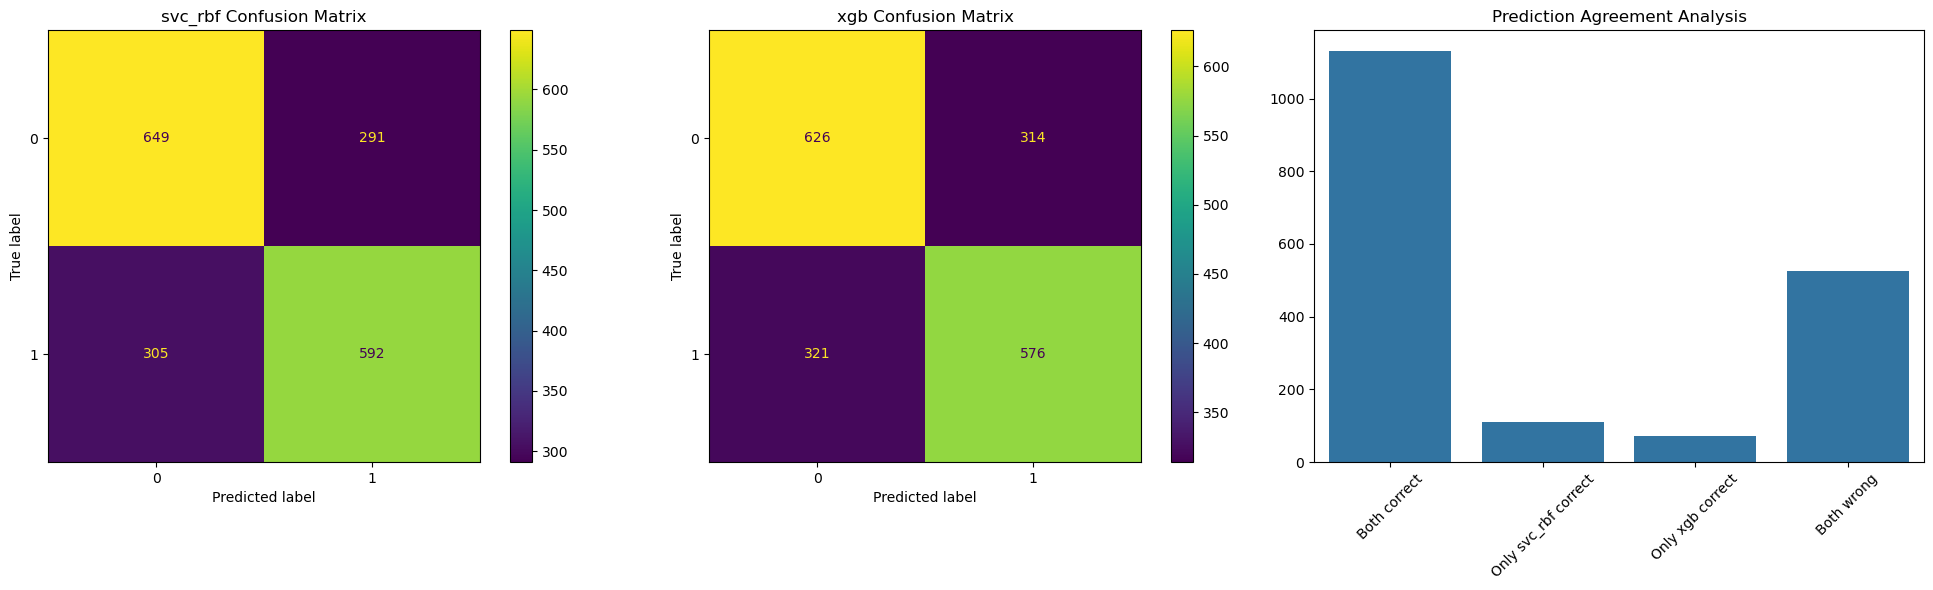

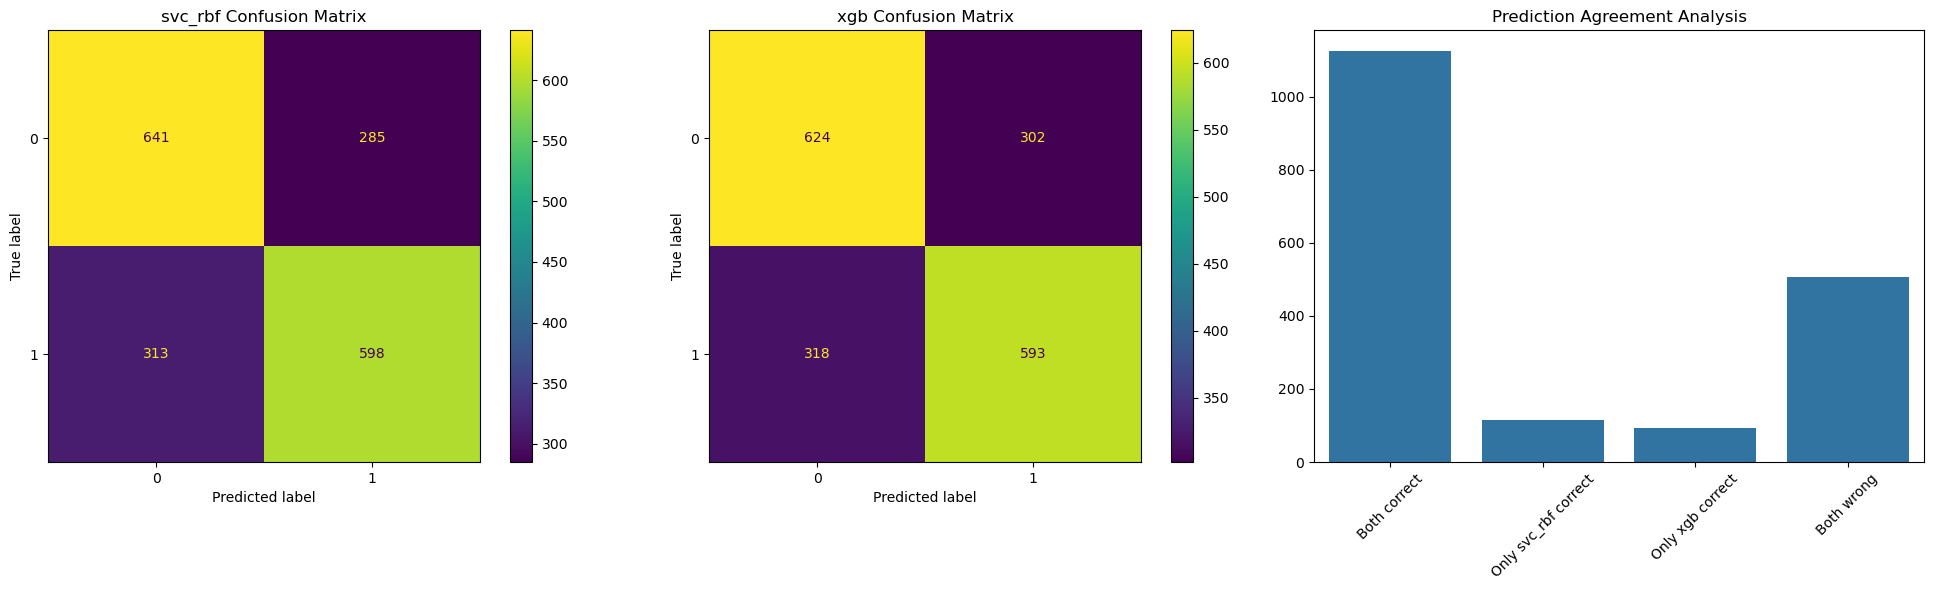

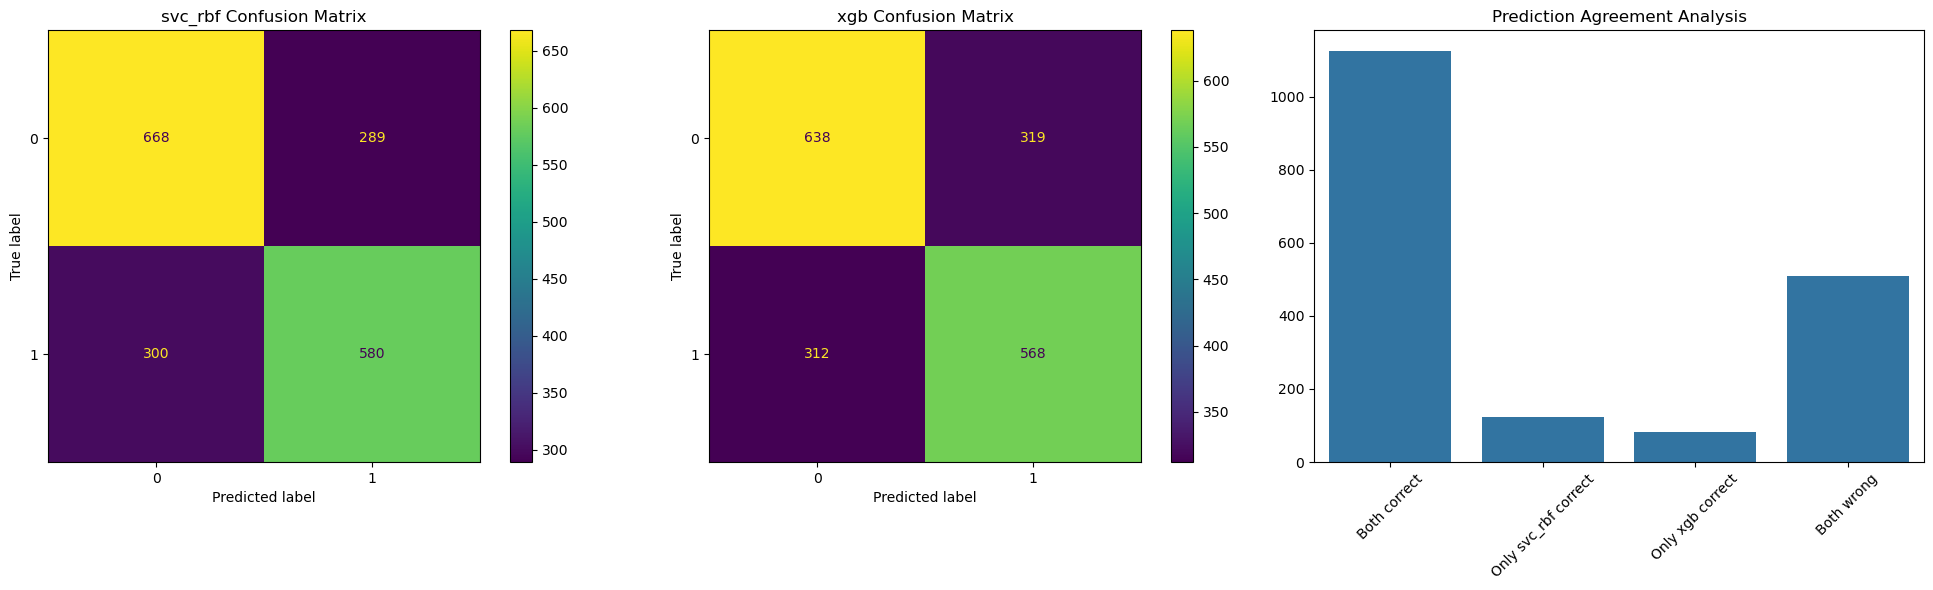

ValueError: Feature shape mismatch, expected: 78, got 74

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compare_classifiers(model1, model2, X_test, y_test, model1_name='Model 1', model2_name='Model 2'):
    """Compare predictions of two binary classifiers"""
    
    # Get predictions
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)
    
    # Set up the figure
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Plot confusion matrices
    ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, ax=axes[0])
    axes[0].set_title(f'{model1_name} Confusion Matrix')
    
    ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, ax=axes[1])
    axes[1].set_title(f'{model2_name} Confusion Matrix')
    
    # Plot disagreements
    disagreements = (y_pred1 != y_pred2)
    correct1 = (y_pred1 == y_test)
    correct2 = (y_pred2 == y_test)
    
    agreement_data = {
        'Both correct': sum((correct1) & (correct2)),
        f'Only {model1_name} correct': sum((correct1) & (~correct2)),
        f'Only {model2_name} correct': sum((~correct1) & (correct2)),
        'Both wrong': sum((~correct1) & (~correct2))
    }
    
    # Plot agreement bar chart
    sns.barplot(x=list(agreement_data.keys()), 
                y=list(agreement_data.values()), ax=axes[2])
    axes[2].set_title('Prediction Agreement Analysis')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return fig

#from the fitted_models_2, create a dictionary of lists, keys = models, items = the fitted models for each split
fitted_models_dict = {}
for model_name, model in fitted_models_2:
    if model_name not in fitted_models_dict:
        fitted_models_dict[model_name] = []
    fitted_models_dict[model_name].append(model)

# # Usage example:
# # For comparing two models from your fitted_models_2 list:
# model1_name = 'svc_rbf'
# model1 = fitted_models_2[3][1]  # First model
# model2_name = 'xgb'
# model2 = xgb_models_2[0].best_estimator_  # Second model

# compare_classifiers(model1, model2, 
#                    splits_2[0][1],  # X_test from first split
#                    splits_2[0][3],  # y_test from first split
#                    model1_name, 
#                    model2_name)
# plt.show()

#range over the splits, for each split compare the predictions of fitted_models_dict['svc_rbf'][i] with the predictions of xgb_models_2[i]. Plot the differences using compare classifiers
for i in range(10):
    model1_name = 'svc_rbf'
    model1 = fitted_models_dict['svc_rbf'][i]  # First model
    model2_name = 'xgb'
    model2 = xgb_models_2[i].best_estimator_  # Second model

    compare_classifiers(model1, model2, 
                       splits_2[i][1],  # X_test from first split
                       splits_2[i][3],  # y_test from first split
                       model1_name, 
                       model2_name)
    plt.show()


In [90]:
from sklearn.ensemble import VotingClassifier

def voter_classifier(X_train, X_test, y_train, y_test, xgb_model):
    # Base classifiers
    estimators = [
        ('log_reg', LogisticRegression(penalty='l2', max_iter=100000)),
        ('svc_rbf', Pipeline([('scale', StandardScaler()),('svc', SVC(kernel='rbf', probability=True))])),
        ('xgb', xgb_model.best_estimator_)
    ]
    
    # Create voter with weights
    voter = VotingClassifier(
        estimators=estimators,
        voting='soft',
        weights=[1, 1.5, 2]  # Adjusted weights
    )
    
    # Fit and predict
    voter.fit(X_train, y_train)
    y_pred = voter.predict(X_test)
    
    return y_pred, voter

# Usage in loop
results_list = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    y_pred, voter = voter_classifier(X_train, X_test, y_train, y_test, xgb_models_2[i])
    
    results_voted_df = pd.DataFrame({
        'model': ['voted'],
        'split': [i],
        'accuracy': [accuracy_score(y_test, y_pred)],
        'precision': [precision_score(y_test, y_pred)],
        'recall': [recall_score(y_test, y_pred)],
        'f1': [f1_score(y_test, y_pred)]
    })
    results_list.append(results_voted_df)
    print(f'Test accuracy for split {i}: {accuracy_score(y_test, y_pred):.4f}')

final_results = pd.concat(results_list)


Test accuracy for split 0: 0.6445
Test accuracy for split 1: 0.6549
Test accuracy for split 2: 0.6587
Test accuracy for split 3: 0.6385
Test accuracy for split 4: 0.6603
Test accuracy for split 5: 0.6614
Test accuracy for split 6: 0.6560
Test accuracy for split 7: 0.6707
Test accuracy for split 8: 0.6516
Test accuracy for split 9: 0.6473


In [93]:
results_df

,model,split,accuracy,precision,recall,f1
